# CPSTONE PROJECT 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas_profiling import ProfileReport

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
train = pd.read_csv('CarPrice_data.csv')
train

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
train.duplicated().sum()

0

In [6]:
train.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


sns.pairplot(train)

<AxesSubplot:xlabel='enginesize', ylabel='price'>

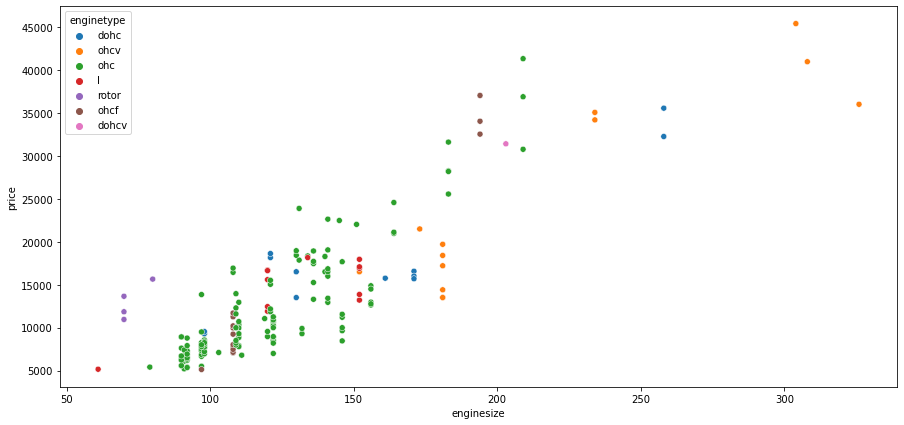

In [7]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=train.enginesize, y=train.price, hue=train.enginetype)

<AxesSubplot:xlabel='horsepower', ylabel='price'>

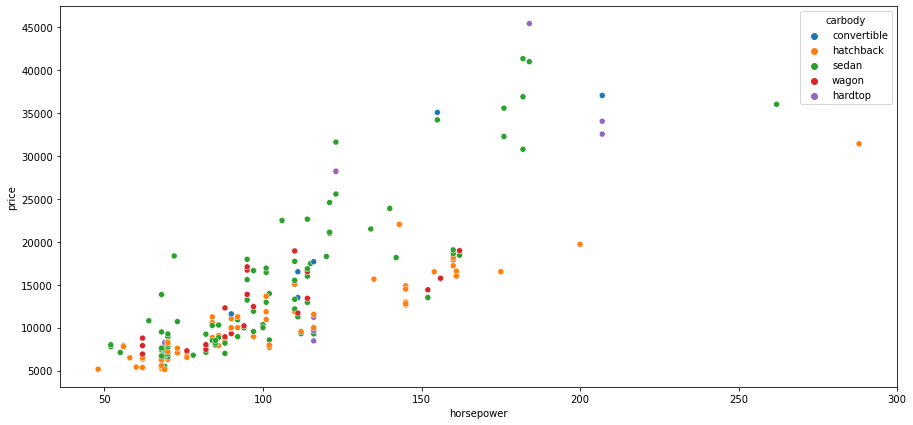

In [8]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=train.horsepower, y=train.price, hue=train.carbody)

<AxesSubplot:xlabel='horsepower', ylabel='highwaympg'>

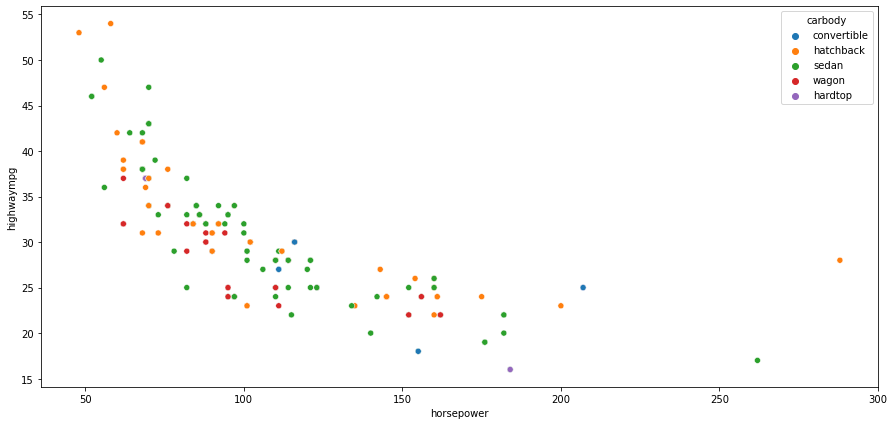

In [9]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=train.horsepower, y=train.highwaympg, hue=train.carbody)

<AxesSubplot:xlabel='price', ylabel='Count'>

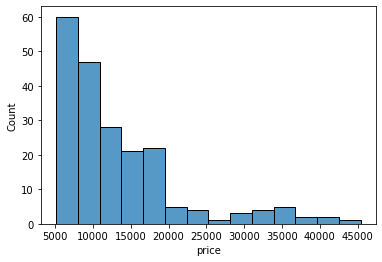

In [10]:
sns.histplot(train.price)

<AxesSubplot:xlabel='horsepower', ylabel='Count'>

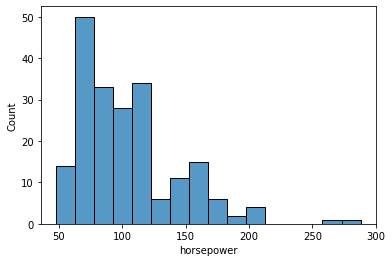

In [11]:
sns.histplot(train.horsepower)

<AxesSubplot:xlabel='highwaympg', ylabel='Count'>

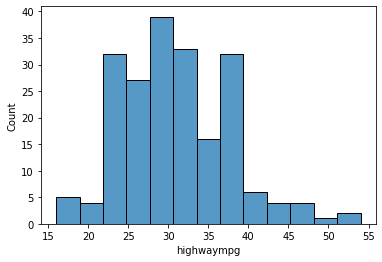

In [12]:
sns.histplot(train.highwaympg)

<AxesSubplot:xlabel='citympg', ylabel='Count'>

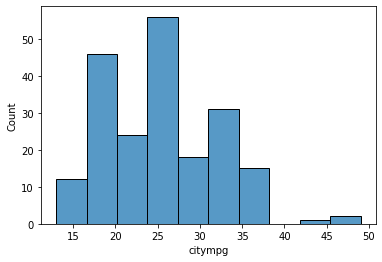

In [13]:
sns.histplot(train.citympg)

In [14]:
encoded_train = pd.get_dummies(train)
encoded_train

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,CarName_chevrolet monte carlo,CarName_chevrolet vega 2300,CarName_dodge challenger se,CarName_dodge colt (sw),CarName_dodge colt hardtop,CarName_dodge coronet custom,CarName_dodge coronet custom (sw),CarName_dodge d200,CarName_dodge dart custom,CarName_dodge monaco (sw),CarName_dodge rampage,CarName_honda accord,CarName_honda accord cvcc,CarName_honda accord lx,CarName_honda civic,CarName_honda civic (auto),CarName_honda civic 1300,CarName_honda civic 1500 gl,CarName_honda civic cvcc,CarName_honda prelude,CarName_isuzu D-Max,CarName_isuzu D-Max V-Cross,CarName_isuzu MU-X,CarName_jaguar xf,CarName_jaguar xj,CarName_jaguar xk,CarName_maxda glc deluxe,CarName_maxda rx3,CarName_mazda 626,CarName_mazda glc,CarName_mazda glc 4,CarName_mazda glc custom,CarName_mazda glc custom l,CarName_mazda glc deluxe,CarName_mazda rx-4,CarName_mazda rx-7 gs,CarName_mazda rx2 coupe,CarName_mercury cougar,CarName_mitsubishi g4,CarName_mitsubishi lancer,CarName_mitsubishi mirage,CarName_mitsubishi mirage g4,CarName_mitsubishi montero,CarName_mitsubishi outlander,CarName_mitsubishi pajero,CarName_nissan clipper,CarName_nissan dayz,CarName_nissan fuga,CarName_nissan gt-r,CarName_nissan juke,CarName_nissan kicks,CarName_nissan latio,CarName_nissan leaf,CarName_nissan note,CarName_nissan nv200,CarName_nissan otti,CarName_nissan rogue,CarName_nissan teana,CarName_nissan titan,CarName_peugeot 304,CarName_peugeot 504,CarName_peugeot 504 (sw),CarName_peugeot 505s turbo diesel,CarName_peugeot 604sl,CarName_plymouth cricket,CarName_plymouth duster,CarName_plymouth fury gran sedan,CarName_plymouth fury iii,CarName_plymouth satellite custom (sw),CarName_plymouth valiant,CarName_porcshce panamera,CarName_porsche boxter,CarName_porsche cayenne,CarName_porsche macan,CarName_renault 12tl,CarName_renault 5 gtl,CarName_saab 99e,CarName_saab 99gle,CarName_saab 99le,CarName_subaru,CarName_subaru baja,CarName_subaru brz,CarName_subaru dl,CarName_subaru r1,CarName_subaru r2,CarName_subaru trezia,CarName_subaru tribeca,CarName_toyota carina,CarName_toyota celica gt,CarName_toyota celica gt liftback,CarName_toyota corolla,CarName_toyota corolla 1200,CarName_toyota corolla 1600 (sw),CarName_toyota corolla liftback,CarName_toyota corolla tercel,CarName_toyota corona,CarName_toyota corona hardtop,CarName_toyota corona liftback,CarName_toyota corona mark ii,CarName_toyota cressida,CarName_toyota mark ii,CarName_toyota starlet,CarName_toyota tercel,CarName_toyouta tercel,CarName_vokswagen rabbit,CarName_volkswagen 1131 deluxe sedan,CarName_volkswagen 411 (sw),CarName_volkswagen dasher,CarName_volkswagen model 111,CarName_volkswagen rabbit,CarName_volkswagen rabbit custom,CarName_volkswagen super beetle,CarName_volkswagen type 3,CarName_volvo 144ea,CarName_volvo 145e (sw),CarName_volvo 244dl,CarName_volvo 245,CarName_volvo 246,CarName_volvo 264gl,CarName_volvo diesel,CarName_vw dasher,CarName_vw rabbit,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginety

<AxesSubplot:>

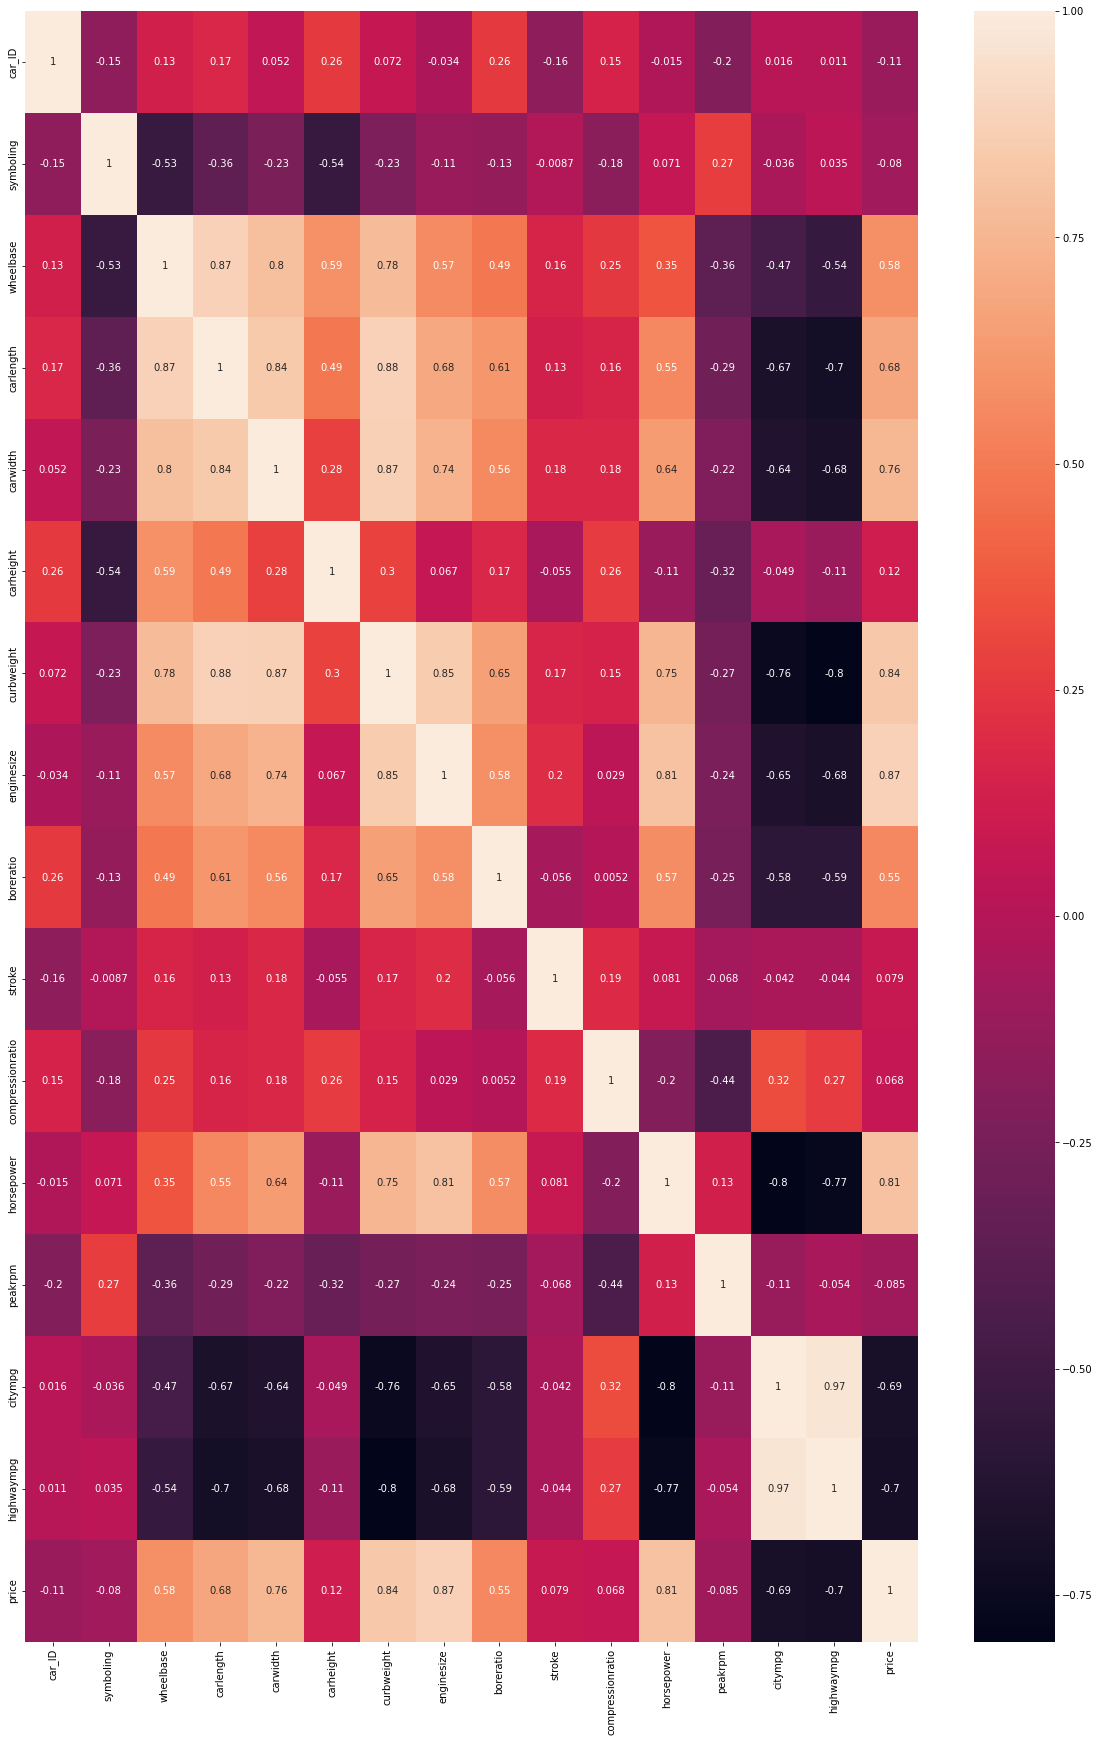

In [15]:
plt.figure(figsize=(20,30))
sns.heatmap(train.corr(), annot=True)

In [16]:
train

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [17]:
X = encoded_train.drop(['price', 'car_ID', 'symboling', 'carheight', 'stroke', 'compressionratio', 'peakrpm'], axis=1)
y = train['price']

In [18]:
from sklearn.preprocessing import StandardScaler

StandardScaler().fit_transform(X)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [21]:
from sklearn.linear_model import LinearRegression, GammaRegressor, LogisticRegression, QuantileRegressor, ARDRegression, ElasticNet

In [22]:
model = LinearRegression()

In [23]:
model.fit(X_train, y_train)

LinearRegression()

In [24]:
pred = model.predict(X_test)
pred

array([ 8379.48815695,  6813.30420416,  6919.7266305 , 11623.84158635,
        2344.9005757 , 28763.98107702,  7163.42462656, -1343.29420752,
        7394.46529156, 12013.88978804, 10285.20545654, 17696.54778142,
       16138.43850244,   577.4119294 , 13338.5550441 , 10427.40752848,
        5463.78647788,  1318.51863033, 20023.07487684,  9956.67593445,
       12278.36196776, -1109.41368049, 16232.02481023,  8910.82276514,
        9247.36875127,  1442.9822163 , 15521.12156644,  9296.91851517,
        3237.92262281,  -415.82042053,  8373.93570761, 11978.71432187,
       15949.17876195,  7962.42272412, 20786.17498207,  9471.55678257,
        9560.84693046, 28108.40952679, 11713.72709766, 20962.35652265,
        4355.3168274 , 20602.77233106,  8970.80520027,  8528.43103768,
        7710.56973352,  7088.80830166, 37516.10771967,  8179.42180949,
       14611.71685565, 14802.68522503, 27272.68624518, 15814.16658338,
       12358.66745503,  7297.08636752, 11396.54457926, 10524.20336816,
      

In [25]:
from sklearn.metrics import max_error, mean_absolute_error, r2_score, mean_squared_error

In [26]:
r2_score(y_test, pred)

0.567865063515391

In [27]:
r2_score(pred, y_test)

0.5441359805829877

In [28]:
mean_absolute_error(y_test, pred)

3315.372302853331

In [29]:
max_error(y_test, pred)

25365.82123805015

In [30]:
from sklearn.neural_network import MLPRegressor, MLPClassifier

In [31]:
MLP = MLPRegressor()

In [32]:
MLP.fit(X_train, y_train)

/home/supatet/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [33]:
MLPpred = MLP.predict(X_test)
MLPpred

array([ 6821.8132282 ,  6951.83469071,  6913.70747661,  6479.87694062,
        7957.79060621, 11467.01875317,  6855.79575492,  5263.69850343,
        6843.7323418 ,  8102.10263168,  9329.11844934,  9802.14854557,
       10011.30223656,  7713.02739287,  9400.79332069,  8973.8189599 ,
        7505.49226762,  6632.79048445,  9390.07602812,  8384.203613  ,
        7900.18459597,  6278.16746289,  8056.51808676,  7230.65372251,
        8617.75647841,  6677.5261086 ,  9726.72347043,  7590.21183049,
        6711.85713121,  6862.22873584,  7314.76692544,  8450.9036846 ,
       11261.02571854,  8605.85287622, 10605.28695093,  7581.76515729,
        7406.69441034, 13308.27829938,  8310.05141442, 10066.28027933,
        6958.26471527, 10438.94406864,  6922.15608761,  8199.41634501,
        7506.49810953,  6917.0186503 , 13011.20377196,  6528.42443024,
       10294.97953284, 10210.4333067 , 11397.26266287,  9847.2355199 ,
       10100.58362776,  7229.24678408,  8032.63995036,  6478.30592647,
      

In [34]:
r2_score(y_test, MLPpred)

0.03763834225952567

MLPC = MLPClassifier()

MLPC.fit(X_train, y_train)

In [35]:
gamma_re = GammaRegressor()

In [36]:
gamma_re.fit(X_train, y_train)

/home/supatet/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/home/supatet/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/home/supatet/anaconda3/lib/python3.9/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


GammaRegressor()

In [37]:
g_pred = gamma_re.predict(X_test)
g_pred

array([13561.71445455, 13561.71445455, 13561.71445455, 13561.71445455,
       13561.71445455, 13561.71445455, 13561.71445455, 13561.71445455,
       13561.71445455, 13561.71445455, 13561.71445455, 13561.71445455,
       13561.71445455, 13561.71445455, 13561.71445455, 13561.71445455,
       13561.71445455, 13561.71445455, 13561.71445455, 13561.71445455,
       13561.71445455, 13561.71445455, 13561.71445455, 13561.71445455,
       13561.71445455, 13561.71445455, 13561.71445455, 13561.71445455,
       13561.71445455, 13561.71445455, 13561.71445455, 13561.71445455,
       13561.71445455, 13561.71445455, 13561.71445455, 13561.71445455,
       13561.71445455, 13561.71445455, 13561.71445455, 13561.71445455,
       13561.71445455, 13561.71445455, 13561.71445455, 13561.71445455,
       13561.71445455, 13561.71445455, 13561.71445455, 13561.71445455,
       13561.71445455, 13561.71445455, 13561.71445455, 13561.71445455,
       13561.71445455, 13561.71445455, 13561.71445455, 13561.71445455,
      

In [38]:
r2_score(y_test, g_pred)

-0.014709579724628163

log_reg = LogisticRegression()

log_reg.predict(X_test)

In [39]:
qt = QuantileRegressor()

In [40]:
qt.fit(X_train, y_train)

QuantileRegressor()

In [41]:
qt_pred = qt.predict(X_test)
qt_pred

array([ 6225.42189689,  6701.04177125,  6261.82409389,  5350.43541747,
       10046.69070722, 22061.80553884,  6511.24536621,   780.38156128,
        6098.20650335, 10772.45138533, 15145.23724516, 16619.57561283,
       16765.22491175,  9503.48030662, 16961.96562873, 14682.34334079,
        9145.95652273,  6072.17037626, 15855.24508971, 11689.31214305,
       10488.30579227,  5280.26123803, 10604.65933759,  8437.53772758,
       13844.6212772 ,  6176.88563421, 17714.60654524,  7622.26928216,
        5892.6904765 ,  6530.29962979,  7643.4325314 , 11723.34409363,
       24314.64671768, 12530.60036267, 18006.96570837,  7602.63517129,
        8849.85405575, 30824.25223509, 11152.61023105, 16896.11898419,
        6786.12291833, 20738.86357984,  6377.0632134 , 10764.93323262,
        8921.04824566,  6642.13943865, 32267.87560448,  5499.48402703,
       17953.77126724, 19956.22248255, 21930.9114664 , 15105.75866387,
       18124.35432445,  7453.63612637, 10608.83379478,  5350.43541747,
      

In [42]:
r2_score(y_test, qt_pred)

0.7888939683993001

In [43]:
mean_absolute_error(y_test, qt_pred)

2257.9230763568216

In [44]:
max_error(y_test, qt_pred)

17000.353282316788

----------------

**** QuantileRegressor promising
_______________________________________________________________

In [45]:
ARDReg = ARDRegression()

In [46]:
ARDReg.fit(X_train, y_train)

ARDRegression()

In [47]:
ARD_pred = ARDReg.predict(X_test)
ARD_pred

array([ 5574.90947354,  5136.84535099,  6057.61824604,  5943.06091741,
        6622.00128783, 24634.83999652,  5600.07283094, -3945.35615621,
        5851.15535969, 11567.44361251, 13039.72210749, 17255.48146357,
       13677.50972471,  8292.94208973, 14407.85744781, 10372.42289575,
        6404.37979656,  5544.91587103, 16982.33664537, 11530.31112357,
       11064.06615544,  4680.07446702, 16373.80837736,  7253.73289473,
        8203.35641075,  5677.05244317, 14542.81954498,  9288.14118076,
        6061.1233941 ,  6494.31330299,  7725.31916992,  9526.32775746,
       19592.77531469, 10183.06258216, 18610.60401108,  9263.36597258,
        9599.4968445 , 26772.56695995, 10469.68270608, 18704.20092423,
        4242.35061056, 17690.73934591,  5760.78327975,  7836.99691752,
        8636.43233485,  5620.23605998, 32825.14401766,  5674.13905319,
       16647.12383315, 16110.24602507, 23645.21454382, 15829.36457591,
       16361.36236716,  8035.60262778, 11375.85519887,  4964.53910574,
      

In [48]:
r2_score(y_test, ARD_pred)

0.7388518242011837

In [49]:
el_net = ElasticNet()

In [50]:
el_net.fit(X_train, y_train)

ElasticNet()

In [51]:
el_pred = el_net.predict(X_test)
el_pred

array([ 6245.88428462,  6020.26790791,  5735.06381662,  5961.80353045,
        8427.68389788, 24772.01605465,  6802.78533647,  -321.03867469,
        5843.17498933, 11447.28186094, 16283.14927634, 16780.41500274,
       16281.25823135,  9490.11586239, 17514.45662091, 15883.77826471,
        8843.86628741,  6872.54948001, 14314.03696194, 11715.04158531,
       11969.73054142,  6452.40825885, 11179.13394814,  8280.49350393,
       14877.57424404,  6912.2341656 , 17525.77618742,  7817.38181471,
        5836.67729406,  6987.95768565,  7397.67186515, 11362.96159275,
       27047.8702858 , 12578.15532464, 18483.28034439,  7740.41531206,
        9385.47351602, 33806.04619915, 10905.07905254, 18125.46699375,
        6359.32513387, 22660.18601408,  6658.66004914, 10326.73688977,
        9888.05505769,  5943.50318855, 39215.45172608,  5693.29772701,
       18393.7571638 , 21257.09679186, 24586.06421518, 15096.52724757,
       19405.01258319,  7521.4120646 , 10701.32209922,  5322.53237087,
      

In [52]:
r2_score(y_test, el_pred)

0.8297228773224685

# ELSTIC NET IS WOW